In [1]:
import wandb

wandb.login()

wandb: Currently logged in as: prakhars962. Use `wandb login --relogin` to force relogin


True

In [2]:
import random
import yaml
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

In [3]:
sweep_config = yaml.safe_load(Path("conf.yaml").read_text())

In [4]:
sweep_id = wandb.sweep(sweep_config, project="artifact_try")

Create sweep with ID: j6wfzqdx
Sweep URL: https://wandb.ai/prakhars962/artifact_try/sweeps/j6wfzqdx


In [5]:
data = np.load('final_data.npz') # Load data from file
keys = list(data.keys()) # all keys in the dictionary
print(keys)
nodes3D = data[keys[0]]
temperature = data[keys[1]]
boundary_nodal_coordinates3D = data[keys[2]]
boundary_solution = data[keys[3]]
# face3 = data[keys[4]]
# face4 = data[keys[5]]
# face5 = data[keys[6]]
# face6 = data[keys[7]]
print(np.shape(nodes3D))
print(np.shape(temperature))
print(np.shape(boundary_nodal_coordinates3D))
print(np.shape(boundary_solution))

['nodes', 'temperature', 'boundary_nodal_coordinates', 'boundary_solution']
(5800, 3)
(5800, 1)
(612, 3)
(612, 1)


In [6]:
# cutting the useless third dimension where there is nothing to predict
nodes = nodes3D[:,[0,2]]
#temperature = temperature3D[:,[0,2]]
boundary_nodal_coordinates = boundary_nodal_coordinates3D[:,[0,2]]
#boundary_solution = boundary_solution3D[:,[0,2]]
print(np.shape(nodes))
print(np.shape(temperature))
print(np.shape(boundary_nodal_coordinates))
print(np.shape(boundary_solution))

(5800, 2)
(5800, 1)
(612, 2)
(612, 1)


Text(0, 0.5, 'y')

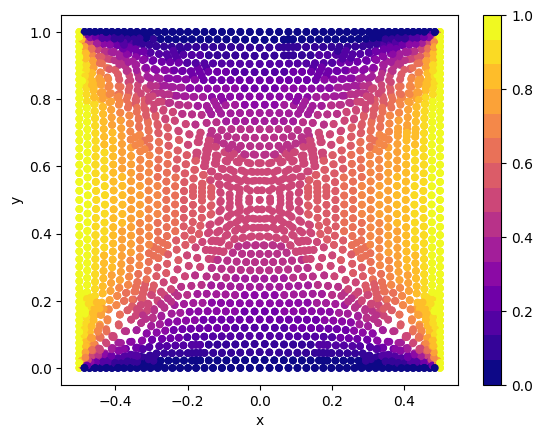

In [7]:
fig = plt.figure(dpi=100)
sc =plt.scatter(nodes[:,0], nodes[:,1], c = temperature, s= 20,cmap=plt.get_cmap('plasma', 15))
plt.colorbar(sc)
plt.xlabel('x')
plt.ylabel('y')

In [8]:
def train(config=None):

    with wandb.init(config=config):
        config = wandb.config
        
        print("Optimiser: ",config.optimizer)
        print("Number of layers: ",config.fc_layer_size)
        print("Dropout: ", config.dropout)
        
        for epoch in range(1000):  # loop over the dataset multiple times
            loss = random.random()
            wandb.log({'epoch': epoch + 1, 'loss': loss})
        wandb.log({ 'chart' : wandb.Image(fig)})
        print('Finished Training')

In [9]:
wandb.agent(sweep_id, function=train)#, count=5)
# Mark the run as finished (useful in Jupyter notebooks)
wandb.finish()

wandb: Agent Starting Run: j6seozw9 with config:
wandb: 	dropout: 0.3
wandb: 	fc_layer_size: 128
wandb: 	optimizer: adam


Optimiser:  adam
Number of layers:  128
Dropout:  0.3
Finished Training


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,▅▅▆▄▇▂▄▁▄▇▇▃▃▇▅█▃▂▄▄▃▆▄▇▁▁▅▆▅▆▃▇▁▂▆▇▅▄▇▂
epoch,1000
loss,0.78748


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.
